# **EDA on Loan Default Dataset**

## Import necessary libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Load the dataset

In [63]:
data = pd.read_csv("loan.csv")

/var/folders/kx/k_t3zvg96kv_xfbqwx6jz4br0000gn/T/ipykernel_2502/2900409819.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv")


## Data Inspection

In [65]:
print(data.head())  # Display first few rows to get an understanding of the dataset

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [66]:
print(data.info())  # Information on columns, types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [67]:
print(data.describe())  # Summary statistics for numeric columns

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

## Data Cleaning
## Check for missing values

In [69]:
print(data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


## Handle missing data

In [115]:
df_filled = data.ffill(inplace=True)
print(df_filled)

None


## Univariate Analysis
## Distribution of loan amounts

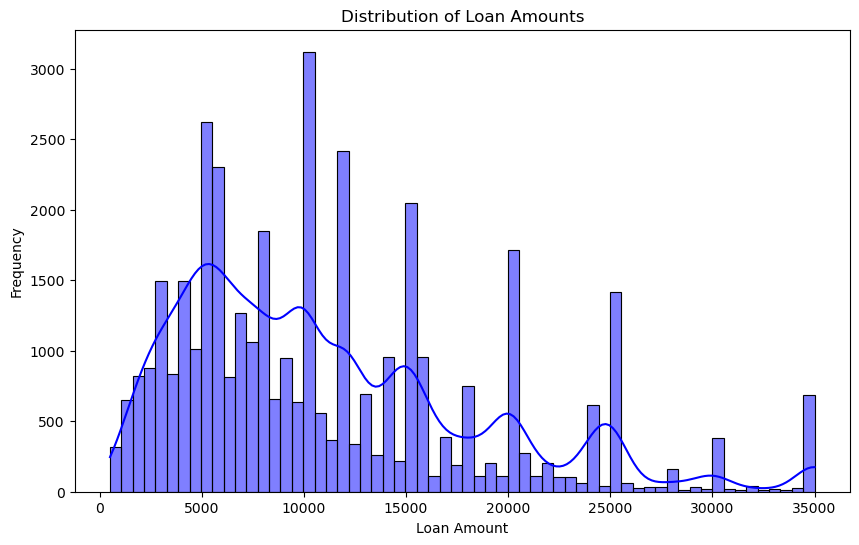

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(data['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

## Create a new column 'loan_default' based on loan_status

In [75]:
data['loan_default'] = data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

## Univariate Analysis: Distribution of Loan Default

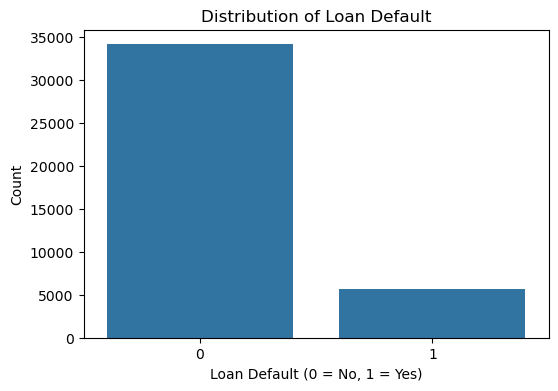

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_default', data=data)
plt.title('Distribution of Loan Default')
plt.xlabel('Loan Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis: Loan Default vs Income (Boxplot)

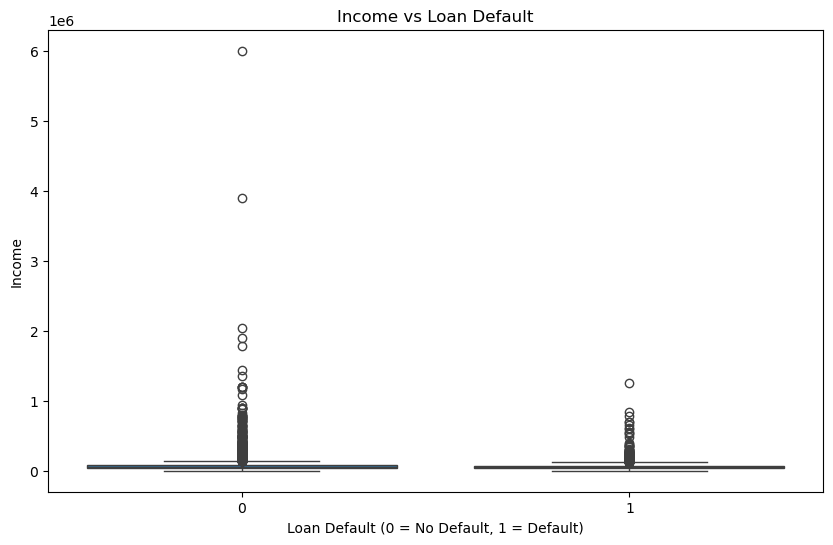

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_default', y='annual_inc', data=data)
plt.title('Income vs Loan Default')
plt.xlabel('Loan Default (0 = No Default, 1 = Default)')
plt.ylabel('Income')
plt.show()

## Bivariate Analysis: Loan Default vs Employment length (Countplot)


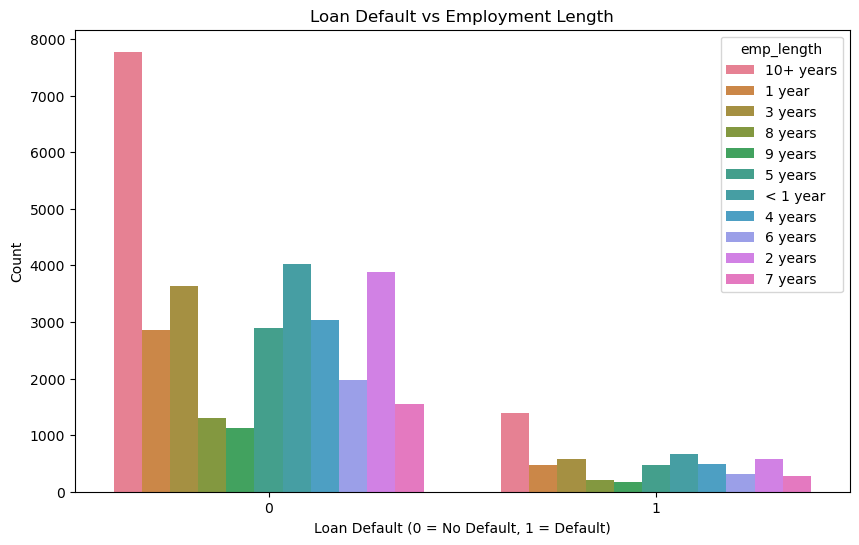

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_default', hue='emp_length', data=data)
plt.title('Loan Default vs Employment Length')
plt.xlabel('Loan Default (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

## Statistical Tests (Chi-Square Test for Categorical Variables)
## Loan Default vs Employment length

In [83]:
contingency_table = pd.crosstab(data['loan_default'], data['emp_length'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test p-value (Loan Default vs Employment Status): {p}')

Chi-Square Test p-value (Loan Default vs Employment Status): 0.13048318160324276


## Convert 'installment' into categorical bins (e.g., low, medium, high)

In [85]:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '500+']
data['installment_cat'] = pd.cut(data['installment'], bins=bins, labels=labels)
print(data['installment_cat'])

0        101-200
1          0-100
2          0-100
3        301-400
4          0-100
          ...   
39712      0-100
39713    201-300
39714    101-200
39715    101-200
39716    201-300
Name: installment_cat, Length: 39717, dtype: category
Categories (6, object): ['0-100' < '101-200' < '201-300' < '301-400' < '401-500' < '500+']


## Perform Chi-Square Test: Loan Default vs Installment Categories

In [87]:
contingency_table = pd.crosstab(data['installment_cat'], data['loan_default'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Test p-value: {p}')

Chi-Square Test p-value: 1.5667787359233254e-06


## Count the number of defaults and non-defaults by employment length

In [89]:
emp_length_default = data.groupby('emp_length')['loan_default'].value_counts().unstack().fillna(0)
print(emp_length_default)

loan_default     0     1
emp_length              
1 year        2857   471
10+ years     7776  1391
2 years       3891   587
3 years       3641   584
4 years       3038   489
5 years       2899   473
6 years       1979   320
7 years       1553   271
8 years       1307   215
9 years       1120   166
< 1 year      4029   660


## Plot pie chart for each employment length

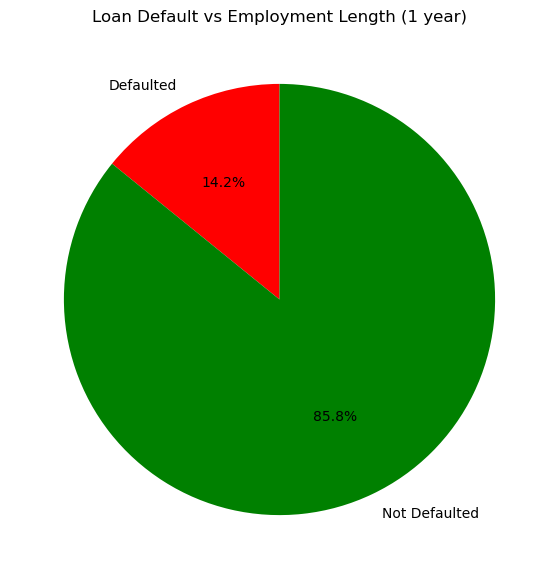

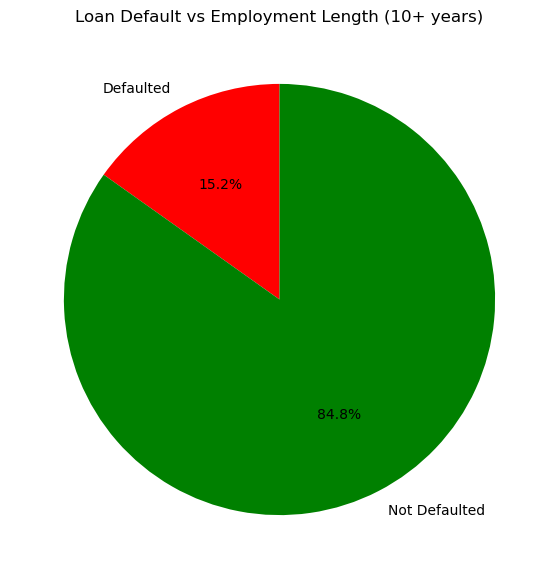

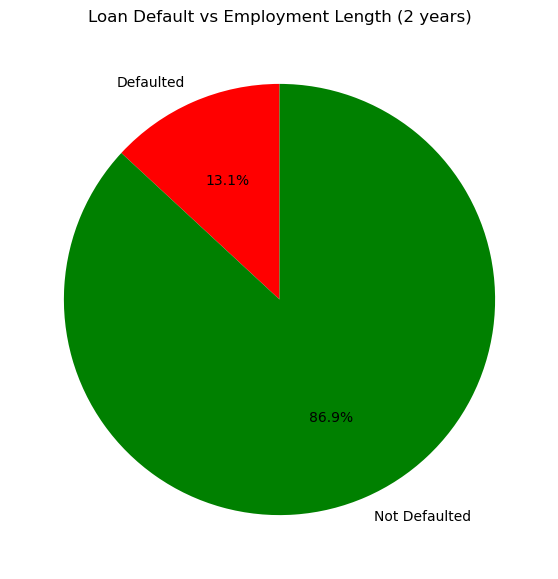

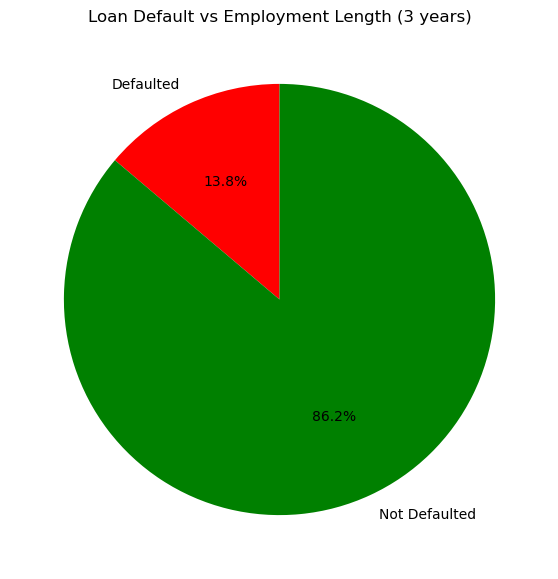

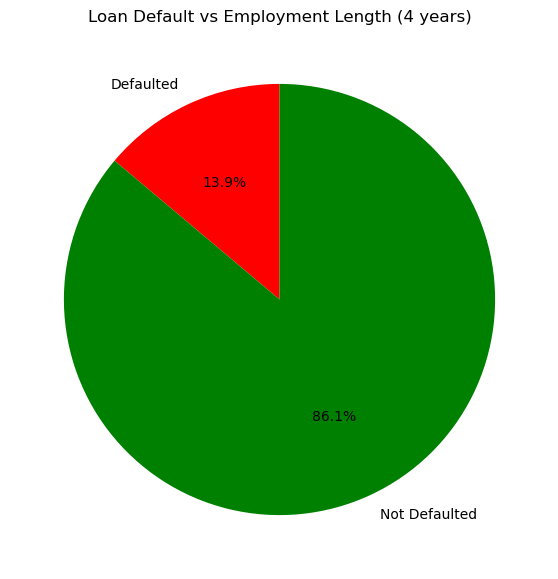

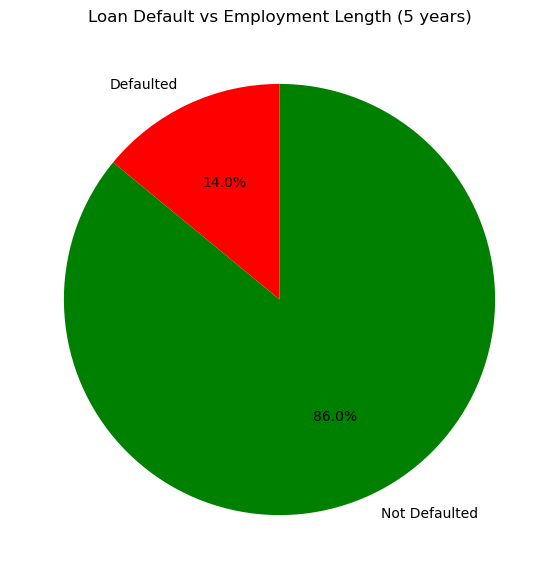

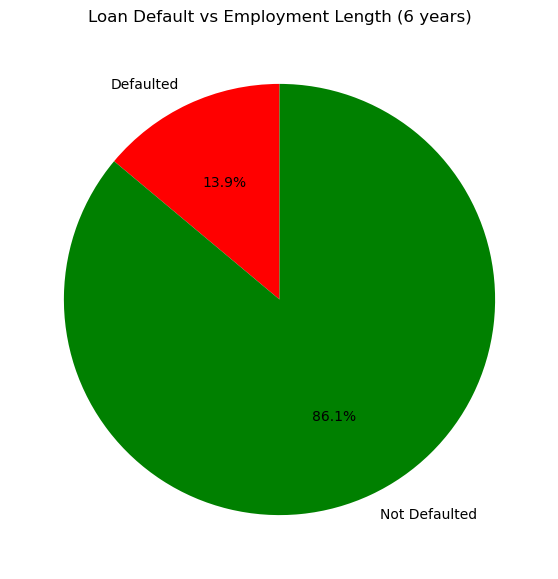

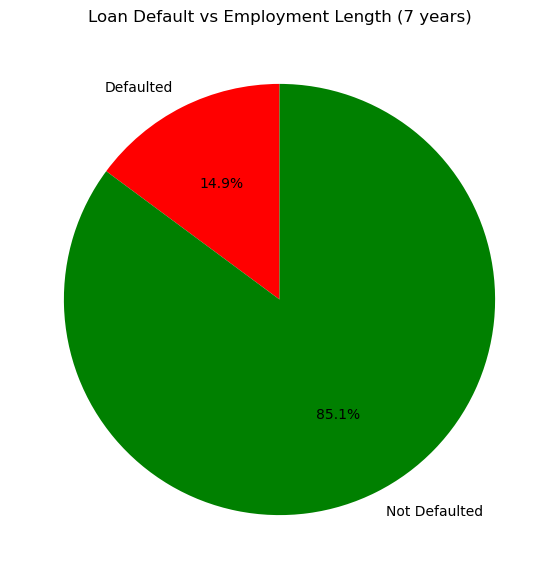

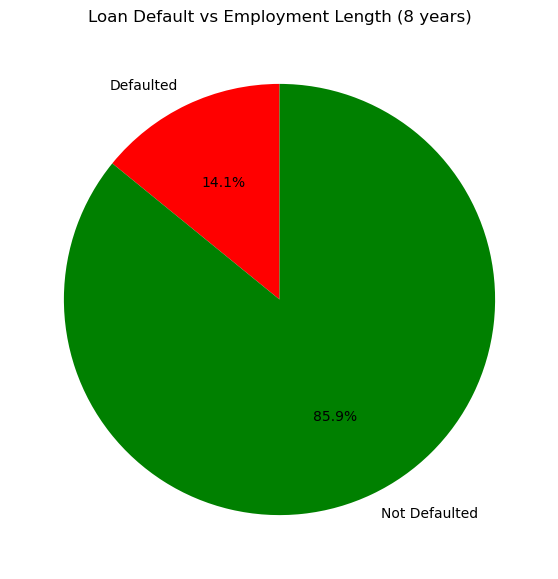

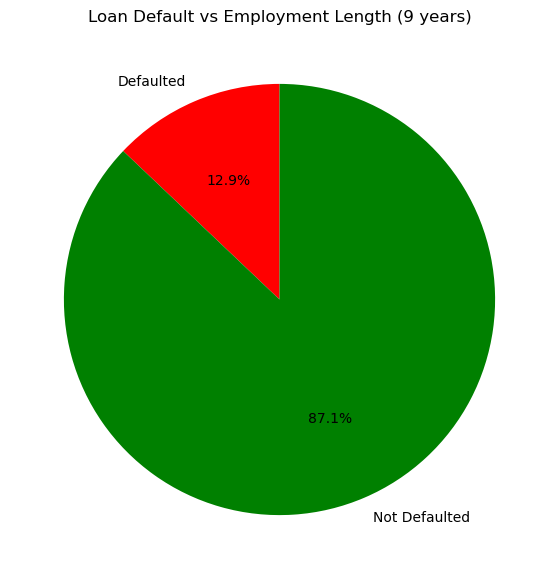

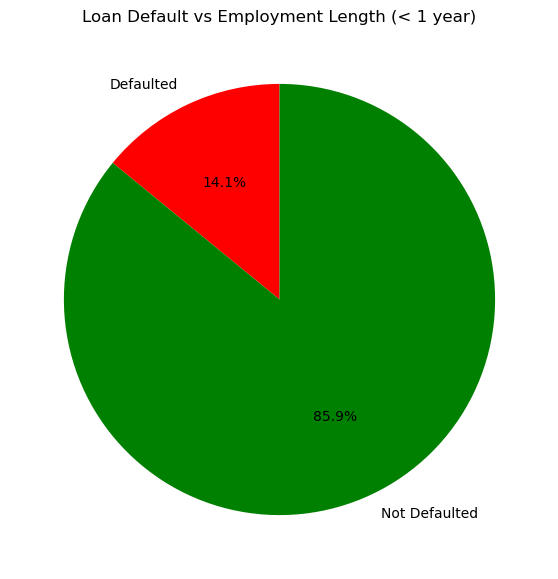

In [91]:
for emp_len in emp_length_default.index:
    default_count = emp_length_default.loc[emp_len, 1]  # Defaults
    non_default_count = emp_length_default.loc[emp_len, 0]  # Non-defaults
    
    labels = ['Defaulted', 'Not Defaulted']
    sizes = [default_count, non_default_count]
    
    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    plt.title(f'Loan Default vs Employment Length ({emp_len})')
    plt.show()


## Multivariate Analysis (Exploring Relationships Between Multiple Variables)

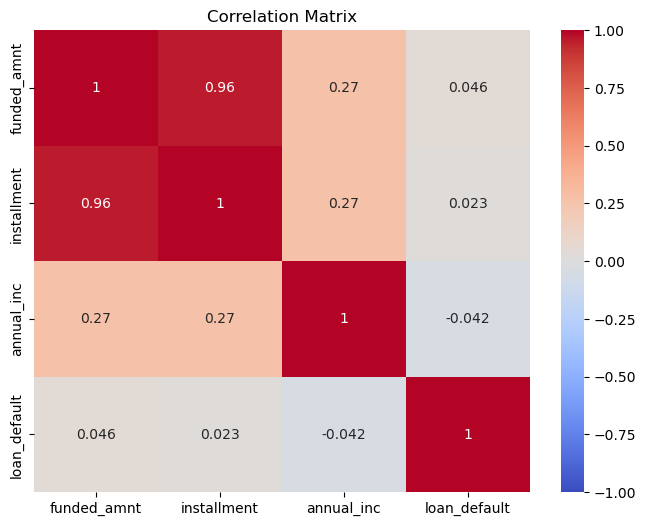

In [93]:
# Correlation matrix for numerical variables
corr_matrix = data[['funded_amnt', 'installment', 'annual_inc', 'loan_default']].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Show the details of risky applicants

In [95]:
risky_applicants = data[data['loan_default'] == 1]
top_risky_applicants = risky_applicants.sort_values(by='loan_amnt', ascending=False).head(10)
print("Top 10 Risky Applicants based on Loan Amount:")
print(top_risky_applicants[['member_id', 'loan_amnt', 'loan_status']])

Top 10 Risky Applicants based on Loan Amount:
       member_id  loan_amnt  loan_status
16806     921363      35000  Charged Off
17312     910779      35000  Charged Off
13014     992162      35000  Charged Off
4241     1232359      35000  Charged Off
4267     1231984      35000  Charged Off
7440     1081056      35000  Charged Off
17314     910970      35000  Charged Off
13889     976453      35000  Charged Off
18958     874161      35000  Charged Off
10172    1047042      35000  Charged Off
